<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [4]:

#takes many many many tries before repeat => PRNG
#typically produces uniformly distributed numbers betwn 0 and 1


### 1.2 NumPy’s PRNG

In [5]:
#use of numpy to generate some random numbers

np.random.rand()                # Give one number

0.35478931112332646

In [6]:
np.random.rand(10)              # Give ten numbers`

array([0.21254337, 0.84062288, 0.62154214, 0.35747876, 0.84331568,
       0.49213307, 0.81362675, 0.43490305, 0.07182953, 0.17050884])

In [7]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.45520212, 0.29439978],
       [0.35322901, 0.73894139],
       [0.51904077, 0.44125041],
       [0.2499233 , 0.26419368],
       [0.73401571, 0.54867256]])

In [8]:
#Numbers are evenly distributed to cover interval btwn 0 and 1

n = 10000
random_numbers = np.random.rand(n)

# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

50.23

In [9]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

25.180000000000003

In [10]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

23.87

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

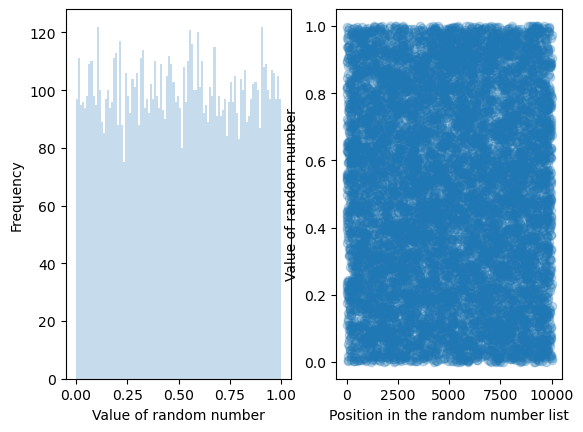

In [11]:
from matplotlib import pyplot as plt

n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

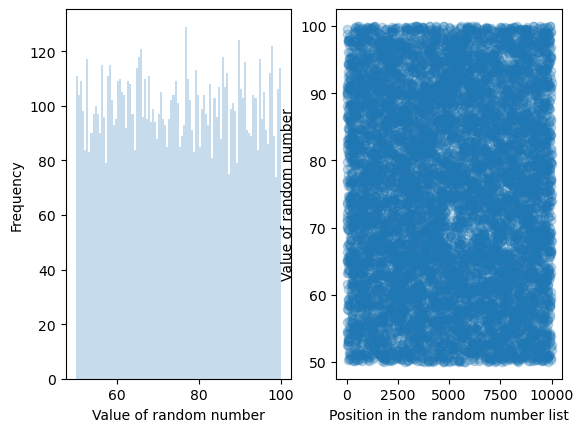

In [12]:
#when random numbers needed for range OTHER THAN 0 to 1,

#use np.random.uniform()

n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n) #KEY PART

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [13]:
#PRNG to generate same set of numbers (e.g.when debugging)

#done by specifying a seed

np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([ 4, 54, 73, 23,  1, 45, 83, 55, 53,  1])

In [14]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([82,  1, 89, 33, 21, 23, 92, 55, 93, 94])

In [15]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [16]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [17]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)  #picks one of the options randomly

In [18]:
#check if function works

questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [19]:
np.random.choice(['Head', 'Tails'])

'Head'

In [20]:
#10 flips
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [21]:
#if set (0,.5] as tails and [.5,1) as heads

def flip_coins(no_of_coins=1, probability=.5):  #fair coin => probability = .5
    '''
    Returns the number of values greater that     
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads


no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%') #recall .2f => 2dp

Number of heads: 51.60%


### 3.2 A biased coin

In [22]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)   #(0.0.3] = tails, [0.3,1)= heads?
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.70%


### 3.3 A flipping experiment

In [23]:
#Flip 10 coins => what is the probability(head)=0.7

#flip 10 coins 10000 times and count number of heads

no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)   #np.unique with return_counts=True returns
                                                         #unique values (of heads) in list and how many times occur

In [24]:
heads_probability = heads_counts/no_of_repeats

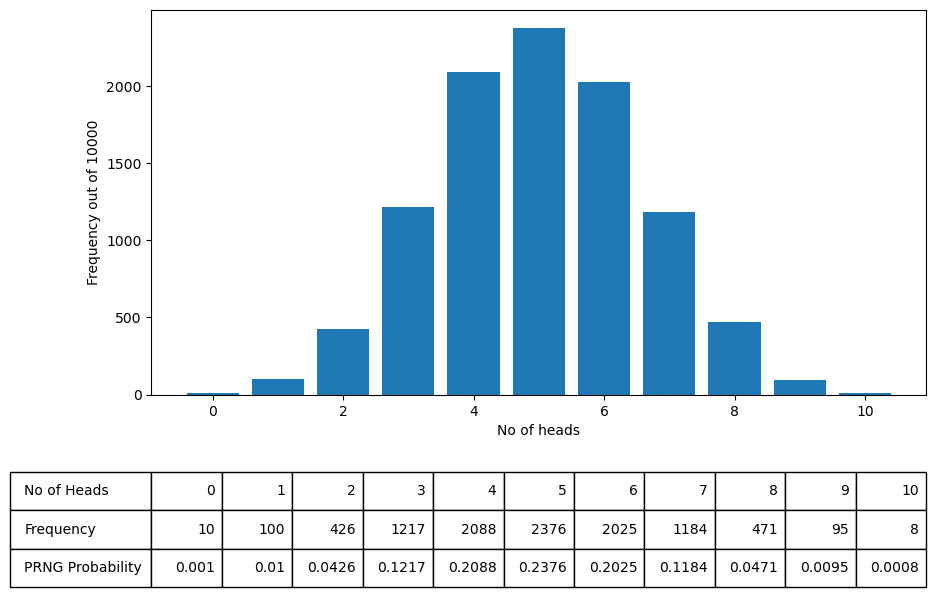

In [25]:
#Plotting data

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [26]:
#SciPy used to calculate distributions using pmf()

from scipy.stats import binom

/Users/gaby/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Exercise 1 :  12C, 13C

In [27]:
#1

def thirteen_C(no_of_atoms=27, probability =0.9889):
    results = np.random.rand(no_of_atoms)
    no_of_13carbon = np.sum(results>probability)
    return no_of_13carbon

In [30]:
n = 10000
result = [thirteen_C() for _ in range(n)]
print(f'mean number of 13C atoms is {np.mean(result)} and standard deviation is {np.std(result)}')

mean number of 13C atoms is 0.3101 and standard deviation is 0.5554619608938132


In [31]:
number_of_repeats=10000

zero = [thirteen_C()==0 for _ in range(number_of_repeats)]
            # checking 10000 cholesterol, where number of 13C=0 and keep score 
x=0

for i in zero:         #number of times out of 10000 repeats where number of 13C = 0
    if i==True:         #add to x (store number of times cholesterol no 13C)
        x+=1
        
no_thirteen_C_probability = x/number_of_repeats   #divide total to find probability

print(no_thirteen_C_probability)

0.7442
